# Pull Request Analysis

In [1]:
import psycopg2
import pandas as pd 
# from sqlalchemy.types import Integer, Text, String, DateTime
import sqlalchemy as s
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

with open("config.json") as config_file:
    config = json.load(config_file)

database_connection_string = 'postgres+psycopg2://{}:{}@{}:{}/{}'.format(config['user'], config['password'], config['host'], config['port'], config['database'])

dbschema='augur_data'
engine = s.create_engine(
    database_connection_string,
    connect_args={'options': '-csearch_path={}'.format(dbschema)})

## Pull Request Filter

In [2]:
## List of repository IDs for the report
repo_dict = {26214, 26219, 25158, 26217, 26218}

# Identifying the Longest Running Pull Requests

## Getting the Data

In [3]:
pr_slow20 = pd.DataFrame()
print(pr_slow20)

#    sql_DFa = pd.read_sql

for value in repo_dict: 

    pr_slow20query = f"""
                    SELECT
                        repo.repo_id AS repo_id,
                        pull_requests.pr_src_id AS pr_src_id,
                        repo.repo_name AS repo_name,
                        repo_groups.rg_name AS repo_group,
                        pull_requests.pr_created_at AS pr_created_at,
                        pull_requests.pr_closed_at AS pr_closed_at,
                        date_part( 'year', pr_created_at :: DATE ) AS CREATED_YEAR,
                        date_part( 'month', pr_created_at :: DATE ) AS CREATED_MONTH,
						date_part( 'year', pr_closed_at :: DATE ) AS CLOSED_YEAR,
                        date_part( 'month', pr_closed_at :: DATE ) AS CLOSED_MONTH,
                        ( EXTRACT ( EPOCH FROM pull_requests.pr_closed_at ) - EXTRACT ( EPOCH FROM pull_requests.pr_created_at ) ) / 3600 AS hours_to_close,
                        ( EXTRACT ( EPOCH FROM pull_requests.pr_closed_at ) - EXTRACT ( EPOCH FROM pull_requests.pr_created_at ) ) / 86400 AS days_to_close, 
                        pull_requests.pr_html_url as pr_url, pull_requests.pr_src_title as pr_title
                    FROM
                        repo,
                        repo_groups,
                        pull_requests 
                    WHERE
                        repo.repo_group_id = repo_groups.repo_group_id 
                        AND repo.repo_id = pull_requests.repo_id 
                        AND repo.repo_id = {value} 
                        AND pull_requests.pr_src_state = 'closed' 
                    ORDER BY
                       hours_to_close desc

        """
    pr_slow20a = pd.read_sql_query(pr_slow20query, con=engine)
    repo_id = value
    if not pr_slow20.empty: 
#        print(sql_DFa)
        pr_slow20 = pd.concat([pr_slow20, pr_slow20a]) 
#        print(sql_DF)
    else: 
        print('first time')
        pr_slow20 = pr_slow20a
#        print(sql_DF)
pr_slow20.set_index('pr_closed_at','repo_id', 'pr_src_id', )


#pr_slow20.set_index('pr_closed_at')

        




Empty DataFrame
Columns: []
Index: []
first time


,,repo_id,pr_src_id,repo_name,repo_group,pr_created_at,created_year,created_month,closed_year,closed_month,hours_to_close,days_to_close,pr_url,pr_title
,pr_closed_at,,,,,,,,,,,,,
0,2019-06-18 16:32:19,25158,142151611,zephyr,Zephyr-RTOS,2017-09-20 16:57:27,2017.0,9.0,2019.0,6.0,15263.581111,635.982546,https://github.com/zephyrproject-rtos/zephyr/p...,RFC: Arch: Basic MIPS port.
1,2019-06-18 16:33:11,25158,159480686,zephyr,Zephyr-RTOS,2017-12-20 17:55:23,2017.0,12.0,2019.0,6.0,13078.630000,544.942917,https://github.com/zephyrproject-rtos/zephyr/p...,[RFC] Generic SPI Flash driver
2,2019-06-06 19:44:36,25158,158163292,zephyr,Zephyr-RTOS,2017-12-13 17:58:33,2017.0,12.0,2019.0,6.0,12961.767500,540.073646,https://github.com/zephyrproject-rtos/zephyr/p...,Initial support for microchip cec1702
3,2018-11-12 03:23:08,25158,123814932,zephyr,Zephyr-RTOS,2017-06-02 23:04:28,2017.0,6.0,2018.0,11.0,12652.311111,527.179630,https://github.com/zephyrproject-rtos/zephyr/p...,drivers: dma: add shim driver for mcux edma
4,2019-10-29 11:16:16,25158,195447925,zephyr,Zephyr-RTOS,2018-06-18 08:04:07,2018.0,6.0,2019.0,10.0,11955.202500,498.133438,https://github.com/zephyrproject-rtos/zephyr/p...,[RFC] [DNM] cmake: Created functions populatin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8595,2016-06-24 21:39:13,26218,75177486,mbed-os,Competitors,2016-06-24 21:39:04,2016.0,6.0,2016.0,6.0,0.002500,0.000104,https://github.com/ARMmbed/mbed-os/pull/2008,"Revert ""Generalize flag handling"""
8596,2017-09-22 09:37:24,26218,142536669,mbed-os,Competitors,2017-09-22 09:37:15,2017.0,9.0,2017.0,9.0,0.002500,0.000104,https://github.com/ARMmbed/mbed-os/pull/5173,SystemInit updated and commented dummy registe...
8597,2018-10-10 15:50:22,26218,221842886,mbed-os,Competitors,2018-10-10 15:50:15,2018.0,10.0,2018.0,10.0,0.001944,0.000081,https://github.com/ARMmbed/mbed-os/pull/8364,Wrong Repo.


In [4]:
#pr_slow20.set_index('repo_id', 'created_year', 'created_month')

import matplotlib.pyplot as plt
pr_slow20['created_year'] = pr_slow20['created_year'].map(int)
pr_slow20['created_month'] = pr_slow20['created_month'].map(int)
pr_slow20['closed_year'] = pr_slow20['closed_year'].map(int)
pr_slow20['closed_month'] = pr_slow20['closed_month'].map(int)
pr_slow20['repo_id'] = pr_slow20['repo_id'].map(int)
pr_slow20['created_month'] = pr_slow20['created_month'].map(lambda x: '{0:0>2}'.format(x))
pr_slow20['closed_month'] = pr_slow20['closed_month'].map(lambda x: '{0:0>2}'.format(x))

pr_slow20['created_yearmonth'] = pr_slow20['created_year'].map(str)+pr_slow20['created_month'].map(str)
pr_slow20['closed_yearmonth'] = pr_slow20['closed_year'].map(str)+pr_slow20['closed_month'].map(str)

pr_slow20.set_index('repo_id',  'closed_yearmonth')
#print(sql_DF)
#sql_DF.dtypes

,pr_src_id,repo_name,repo_group,pr_created_at,pr_closed_at,created_year,created_month,closed_year,closed_month,hours_to_close,days_to_close,pr_url,pr_title,created_yearmonth,closed_yearmonth
repo_id,,,,,,,,,,,,,,,
25158,142151611,zephyr,Zephyr-RTOS,2017-09-20 16:57:27,2019-06-18 16:32:19,2017,09,2019,06,15263.581111,635.982546,https://github.com/zephyrproject-rtos/zephyr/p...,RFC: Arch: Basic MIPS port.,201709,201906
25158,159480686,zephyr,Zephyr-RTOS,2017-12-20 17:55:23,2019-06-18 16:33:11,2017,12,2019,06,13078.630000,544.942917,https://github.com/zephyrproject-rtos/zephyr/p...,[RFC] Generic SPI Flash driver,201712,201906
25158,158163292,zephyr,Zephyr-RTOS,2017-12-13 17:58:33,2019-06-06 19:44:36,2017,12,2019,06,12961.767500,540.073646,https://github.com/zephyrproject-rtos/zephyr/p...,Initial support for microchip cec1702,201712,201906
25158,123814932,zephyr,Zephyr-RTOS,2017-06-02 23:04:28,2018-11-12 03:23:08,2017,06,2018,11,12652.311111,527.179630,https://github.com/zephyrproject-rtos/zephyr/p...,drivers: dma: add shim driver for mcux edma,201706,201811
25158,195447925,zephyr,Zephyr-RTOS,2018-06-18 08:04:07,2019-10-29 11:16:16,2018,06,2019,10,11955.202500,498.133438,https://github.com/zephyrproject-rtos/zephyr/p...,[RFC] [DNM] cmake: Created functions populatin...,201806,201910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26218,75177486,mbed-os,Competitors,2016-06-24 21:39:04,2016-06-24 21:39:13,2016,06,2016,06,0.002500,0.000104,https://github.com/ARMmbed/mbed-os/pull/2008,"Revert ""Generalize flag handling""",201606,201606
26218,142536669,mbed-os,Competitors,2017-09-22 09:37:15,2017-09-22 09:37:24,2017,09,2017,09,0.002500,0.000104,https://github.com/ARMmbed/mbed-os/pull/5173,SystemInit updated and commented dummy registe...,201709,201709
26218,221842886,mbed-os,Competitors,2018-10-10 15:50:15,2018-10-10 15:50:22,2018,10,2018,10,0.001944,0.000081,https://github.com/ARMmbed/mbed-os/pull/8364,Wrong Repo.,201810,201810


## Filtering on Dates and Percentiles

### Dates

In [5]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import datetime as dt
start_date = pd.to_datetime('2017-07-01 01:00:00')
end_date = pd.to_datetime('2020-02-01 09:00:00')
#https://github.com/mwaskom/seaborn/issues/1641


pr_slow20 = pr_slow20[(pr_slow20['pr_closed_at'] > start_date) & (pr_slow20['pr_closed_at'] < end_date)]
pr_slow20['date'] = pr_slow20['pr_closed_at'].dt.date

## Getting the 20% of pull requests that are the slowest


In [6]:
pr_slow20_filtered = pd.DataFrame()
pr_slow20_x = pd.DataFrame()
for value in repo_dict: 
    if not pr_slow20_filtered.empty: 
        pr_slow20x = pr_slow20.query('repo_id==@value')
        pr_slow20x['percentile_rank_local'] = pr_slow20x.days_to_close.rank(pct=True)
        pr_slow20x = pr_slow20x.query('percentile_rank_local >= .8', )
        pr_slow20_filtered = pd.concat([pr_slow20x, pr_slow20_filtered]) 
        reponame = str(value)
        filename = ''.join(['output/pr_slowest20pct', reponame, '.csv'])
        pr_slow20x.to_csv(filename)
    else: 
        print('first time')
        pr_slow20_filtered = pr_slow20.copy()
        pr_slow20_filtered['percentile_rank_local'] = pr_slow20_filtered.days_to_close.rank(pct=True)
        pr_slow20_filtered = pr_slow20_filtered.query('percentile_rank_local >= .8', )


    

first time


/Volumes/SeansRAIDBaby/github/virtualenvs/augur-vizplay/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Percentiles
We also write files out for each REPO id in order to be able to distribute the data

In [7]:
pr_slow20_filtered.dtypes

repo_id                           int64
pr_src_id                        object
repo_name                        object
repo_group                       object
pr_created_at            datetime64[ns]
pr_closed_at             datetime64[ns]
created_year                      int64
created_month                    object
closed_year                       int64
closed_month                     object
hours_to_close                  float64
days_to_close                   float64
pr_url                           object
pr_title                         object
created_yearmonth                object
closed_yearmonth                 object
date                             object
percentile_rank_local           float64
dtype: object

In [11]:
filename = ''.join(['output/pr_slowest20pct', 'all_slow', '.csv'])
pr_slow20_filtered.to_csv(filename)

In [12]:
pr_slow20_filtered['closed_yearmonth'] = pr_slow20_filtered['closed_yearmonth'].map(int)
pr_slow20_filtered['days_to_close'] = pr_slow20_filtered['days_to_close'].map(float)
pr_slow20_filtered['hours_to_close'] = pr_slow20_filtered['hours_to_close'].map(float)
pr_slow20_filtered.dtypes

repo_id                           int64
pr_src_id                        object
repo_name                        object
repo_group                       object
pr_created_at            datetime64[ns]
pr_closed_at             datetime64[ns]
created_year                      int64
created_month                    object
closed_year                       int64
closed_month                     object
hours_to_close                  float64
days_to_close                   float64
pr_url                           object
pr_title                         object
created_yearmonth                object
closed_yearmonth                  int64
date                             object
percentile_rank_local           float64
dtype: object

In [13]:
pr_slow20small = pr_slow20_filtered[['repo_id', 'repo_name', 'closed_yearmonth', 'days_to_close']]
filename = ''.join(['output/pr_slow20small', 'all_slow', '.csv'])

pr_slow20small.to_csv(filename)

In [10]:
print(pr_slow20small)

      repo_id repo_name  closed_yearmonth  days_to_close
2       26218   mbed-os            201804     388.936898
4       26218   mbed-os            201707     375.392512
5       26218   mbed-os            201810     367.608796
6       26218   mbed-os            201707     356.894896
8       26218   mbed-os            201807     350.019456
...       ...       ...               ...            ...
1483    26218   mbed-os            201906      16.292118
1484    26218   mbed-os            201808      16.271806
1485    26218   mbed-os            201808      16.269595
1487    26218   mbed-os            201812      16.249641
1489    26218   mbed-os            201711      16.211667

[7024 rows x 4 columns]


In [14]:
pr_slow20small.dtypes
pr_slow20small.to_csv('output/c.pr_slow20_small.csv')

In [15]:
pr_slow20_mean = pr_slow20small.groupby(['repo_id','closed_yearmonth', 'repo_name'],as_index=False).mean()
pr_slow20_min = pr_slow20small.groupby(['repo_id','closed_yearmonth', 'repo_name'],as_index=False).min()
pr_slow20_max = pr_slow20small.groupby(['repo_id','closed_yearmonth', 'repo_name'],as_index=False).max()

In [16]:
print(pr_slow20_mean)
print(pr_slow20_min)
print(pr_slow20_max)


     repo_id  closed_yearmonth repo_name  days_to_close
0      25158            201707    zephyr      37.666890
1      25158            201708    zephyr      37.544103
2      25158            201709    zephyr      49.134679
3      25158            201710    zephyr      42.187957
4      25158            201711    zephyr      58.005099
..       ...               ...       ...            ...
103    26218            201908   mbed-os      54.749897
104    26218            201909   mbed-os      65.446233
105    26218            201910   mbed-os      47.132551
106    26218            201911   mbed-os      40.099788
107    26218            201912   mbed-os      48.151081

[108 rows x 4 columns]
     repo_id  closed_yearmonth repo_name  days_to_close
0      25158            201707    zephyr      17.075856
1      25158            201708    zephyr      18.773738
2      25158            201709    zephyr      18.964595
3      25158            201710    zephyr      16.209502
4      25158            

In [17]:
pr_slow20_mean.set_index('closed_yearmonth','repo_id')

,repo_id,repo_name,days_to_close
closed_yearmonth,,,
201707,25158,zephyr,37.666890
201708,25158,zephyr,37.544103
201709,25158,zephyr,49.134679
201710,25158,zephyr,42.187957
201711,25158,zephyr,58.005099
...,...,...,...
201908,26218,mbed-os,54.749897
201909,26218,mbed-os,65.446233
201910,26218,mbed-os,47.132551


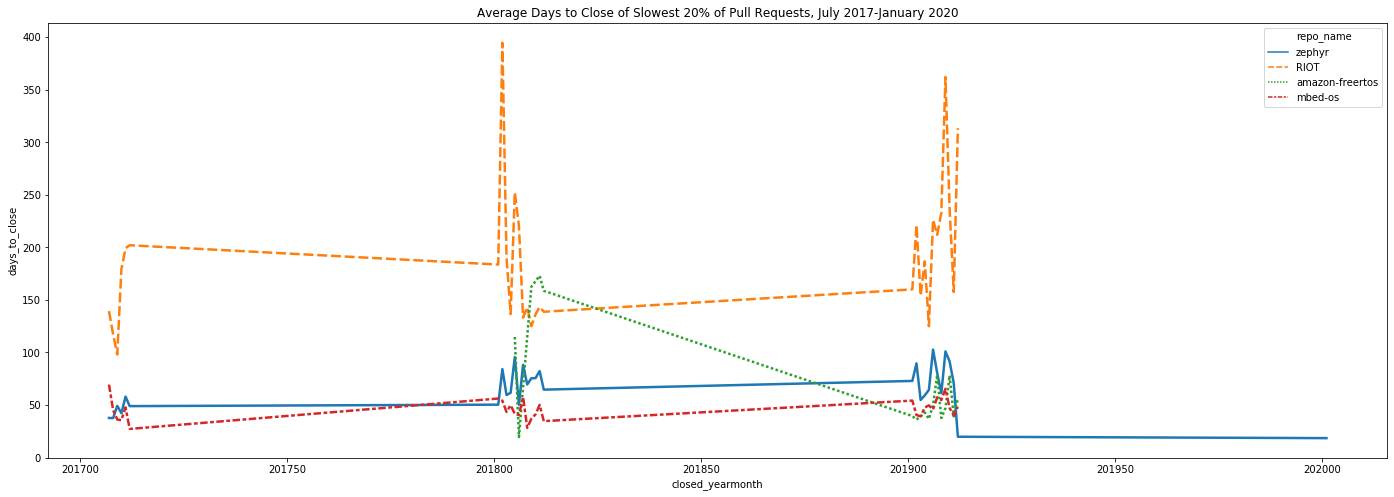

In [18]:
# Total PRS Closed
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(24, 8)
plotter = sns.lineplot(x='closed_yearmonth', y='days_to_close', style='repo_name', data=pr_slow20_mean, sort=True, legend='full', linewidth=2.5, hue='repo_name').set_title("Average Days to Close of Slowest 20% of Pull Requests, July 2017-January 2020")   
#ax.tick_params(axis='x', which='minor', labelsize='small', labelcolor='m', rotation=30)
#plotterlabels = ax.set_xticklabels(pr_slow20_mean['closed_yearmonth'], rotation=90, fontsize=8)
fig.savefig('images/slow_20_mean.png')


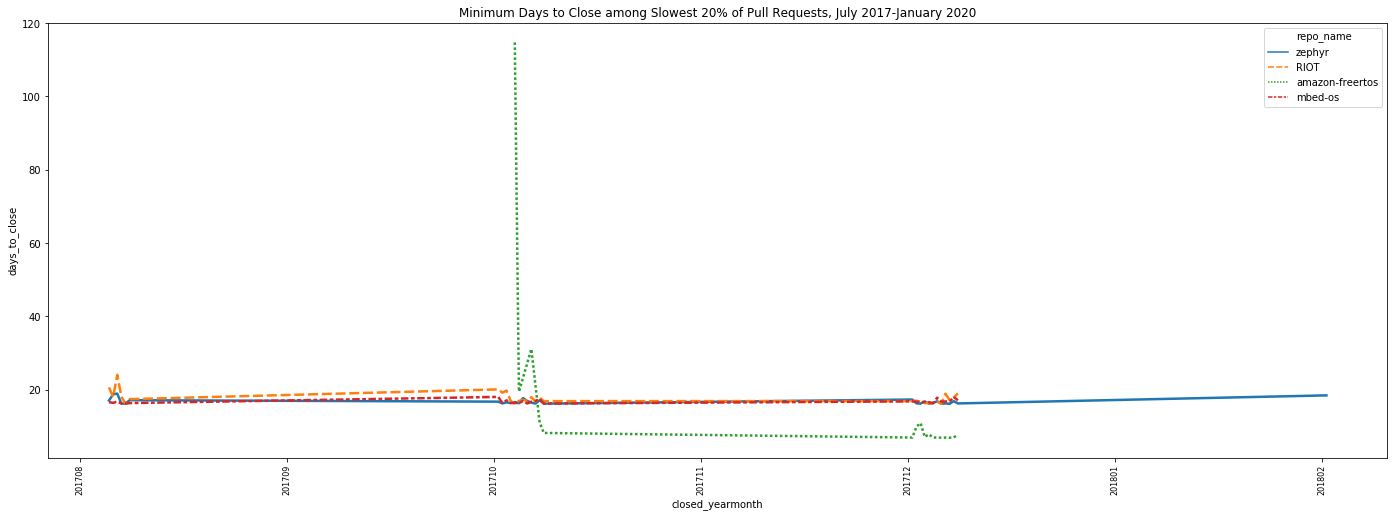

In [19]:
# Total PRS Closed
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(24, 8)
plotter = sns.lineplot(x='closed_yearmonth', y='days_to_close', style='repo_name', data=pr_slow20_min, sort=False, legend='full', linewidth=2.5, hue='repo_name').set_title("Minimum Days to Close among Slowest 20% of Pull Requests, July 2017-January 2020")   
#ax.tick_params(axis='x', which='minor', labelsize='small', labelcolor='m', rotation=30)
plotterlabels = ax.set_xticklabels(pr_slow20_min['closed_yearmonth'], rotation=90, fontsize=8)
fig.savefig('images/slow_20_min.png')


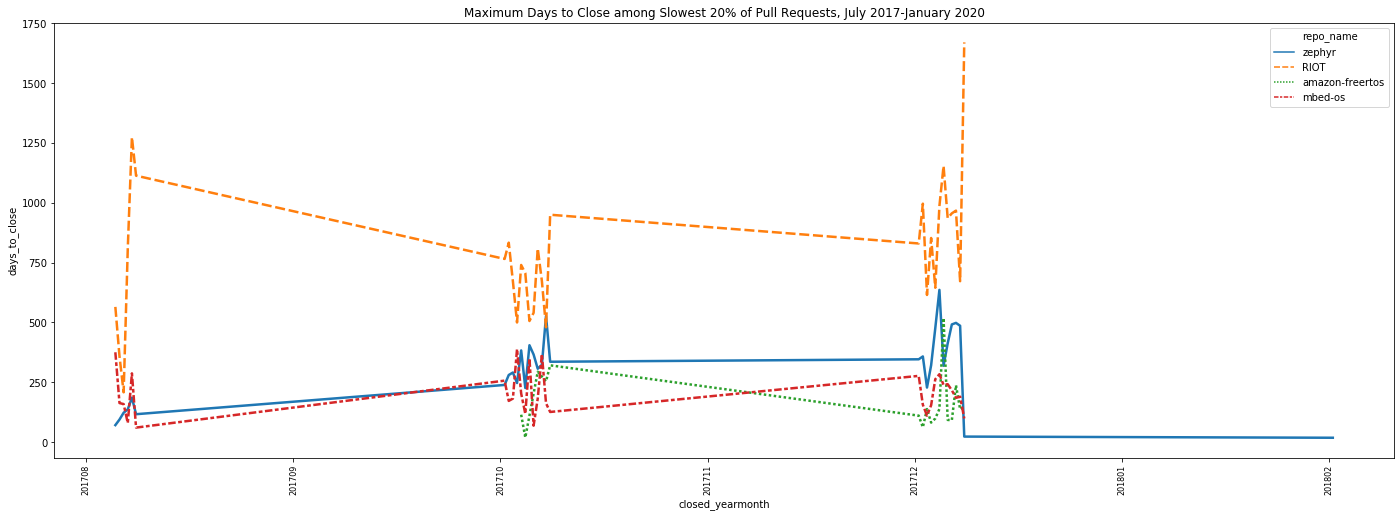

In [20]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(24, 8)
plotter = sns.lineplot(x='closed_yearmonth', y='days_to_close', style='repo_name', data=pr_slow20_max, sort=False, legend='full', linewidth=2.5, hue='repo_name').set_title("Maximum Days to Close among Slowest 20% of Pull Requests, July 2017-January 2020")   
#ax.tick_params(axis='x', which='minor', labelsize='small', labelcolor='m', rotation=30)
plotterlabels = ax.set_xticklabels(pr_slow20_max['closed_yearmonth'], rotation=90, fontsize=8)
fig.savefig('images/slow_20_max.png')

In [ ]:
import pandas_profiling as pp
profile = pp.ProfileReport(pr_slow20)

In [ ]:
profile.to_notebook_iframe()

In [ ]:
pr_slow20_summary = pr_slow20.groupby(['repo_id', 'repo_group', 'repo_name','closed_yearmonth','days_to_close']).mean()


In [ ]:
print(pr_slow20_summary)

In [ ]:

index = pd.MultiIndex.from_arrays(pr_slow20, names=['repo_id', 'repo_group', 'repo_name', 'closed_yearmonth'])
pr20x = pr_slow20.groupby(level=['repo_id', 'repo_group', 'repo_name', 'closed_yearmonth']).mean()

In [ ]:
                                     )['days_to_close'.mean(),
                                       'hours_to_close'.mean(),
                                       'pr_url'.count()
                                      ]

In [ ]:
pr_slow20.dtypes

In [ ]:
print(pr_slow20_summary)

In [ ]:
#Total PRS open and closed by month
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(24, 8)
plottermonth = sns.lineplot(x='yearmonth', y='total_prs_open_closed', style='repo_name', data=pr_slow20, sort=False, legend='full', linewidth=2.5, hue='repo_name').set_title("Total Pull Requests Closed by Month, July 2017-January 2020")   
#ax.tick_params(axis='x', which='minor', labelsize='small', labelcolor='m', rotation=30)
plottermonthlabels = ax.set_xticklabels(pr_monthDF['yearmonth'], rotation=90, fontsize=13)
fig.savefig('images/prs-slow20-monthly-total-open-closed.png')


#Average Days Open by Month
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(24, 24)
plottermonth = sns.lineplot(x='yearmonth', y='wk_avg_days_to_close', style='repo_name', data=pr_slow20, sort=False, legend='full', linewidth=2.5, hue='repo_name').set_title("Average Closed PR Time Open by Month, July 2017-January 2020")   
#ax.tick_params(axis='x', which='minor', labelsize='small', labelcolor='m', rotation=30)
plotterlabels = ax.set_xticklabels(pr_monthDF['yearmonth'], rotation=90, fontsize=8)
fig.savefig('images/prs-slow-average-open-time-month.png')


## Experimental Visualizations
### Slowest 20% Within a Repository

In [ ]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import datetime as dt
start_date = pd.to_datetime('2017-07-01 01:00:00')
end_date = pd.to_datetime('2020-02-01 09:00:00')
#https://github.com/mwaskom/seaborn/issues/1641


pr_slow20 = pr_slow20[(pr_slow20['pr_closed_at'] > start_date) & (pr_slow20['pr_closed_at'] < end_date)]
pr_slow20['date'] = pr_slow20['pr_closed_at'].dt.date


# Seaborn converts plotting inputs to numpy arrays
x = np.asarray(pr_slow20.date)
y = np.asarray(pr_slow20.days_to_close)


sns.set_style('ticks')
#sns.palplot(sns.color_palette('husl', 8))
#sns.set_palette('husl')
sns.set(style="whitegrid")

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(24, 8)
plottermonth = sns.scatterplot(x='date', y='days_to_close', style='repo_name', data=pr_slow20,  legend='full', linewidth=2.5, hue='repo_name').set_title("Pull Requests Closed, July 2017-January 2020")   
#ax.tick_params(axis='x', which='minor', labelsize='small', labelcolor='m', rotation=30)
#plottermonthlabels = ax.set_xticklabels(pr_slow20['pr_closed_at'], rotation=90, fontsize=13)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(DateFormatter("%Y"))
fig.savefig('images/prs-zephyr-slow20.png')
#ax.set(xlim=(2017,2020))




In [ ]:
pr_slow20['days_to_close'].plot.kde(bw_method=.3)
pr_slow20['days_to_close'].plot.kde(bw_method=3)
pr_slow20['days_to_close'].plot.kde(bw_method=7)
